<a href="https://colab.research.google.com/github/Adrianosh3/NeuronaleNetze/blob/Adrian/FastAi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %reload_ext autoreload
# %autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
import PIL
print(PIL.__version__)

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
import fastai
fastai.__version__

In [ ]:
import os
import pandas as pd

In [ ]:
train_folder = '/content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train'
test_folder = '/content/drive/MyDrive/NN_WS2021/Projekt/Datashort/val'
print(os.listdir(train_folder)[:10])
print(os.listdir(test_folder)[:10])

In [ ]:
np.random.seed(2)
fnames = get_image_files(train_folder)
print(fnames[:5])
pat = re.compile(r'(cat|dog)\.\d+\.jpg')

In [ ]:
sz = 32
bs = 32
data = ImageDataBunch.from_name_re(
                                train_folder,
                                fnames,
                                pat,
                                ds_tfms=get_transforms(),
                                size=sz, bs=bs,
                                valid_pct = 0.25,
                                num_workers = 0, # for code safety on kaggle
).normalize(imagenet_stats)
data

In [ ]:
data.classes

In [ ]:
data.show_batch(rows=4, figsize=(7,6))

Modeling and Training

In [ ]:
learn = cnn_learner(
    data,
    models.resnet34,
    metrics=error_rate,
    model_dir="/tmp/model/"
)

In [ ]:
learn.data

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(2e-3))

In [ ]:
#@title
learn.unfreeze()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.117599,0.971599,0.324324,00:20
1,0.203364,0.818083,0.315315,00:20
2,0.203358,0.826697,0.351351,00:20


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

Results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
print(len(data.valid_ds)==len(losses)==len(idxs))

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [ ]:
mc = interp.most_confused(min_val=2)
mcc = [x[0] for x in mc[:5]]
mcc

['cat', 'dog']

In [ ]:
train = pd.DataFrame(os.listdir(train_folder))

In [ ]:
a = ['0']
train.sample(n=10, random_state=1)

,0
306,cat.15.jpg
342,cat.18.jpg
47,dog.138.jpg
67,dog.159.jpg
376,cat.209.jpg
238,dog.88.jpg
312,cat.150.jpg
31,dog.128.jpg
273,cat.118.jpg
90,dog.18.jpg


Prepare submission

/content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train/dog.209.jpg


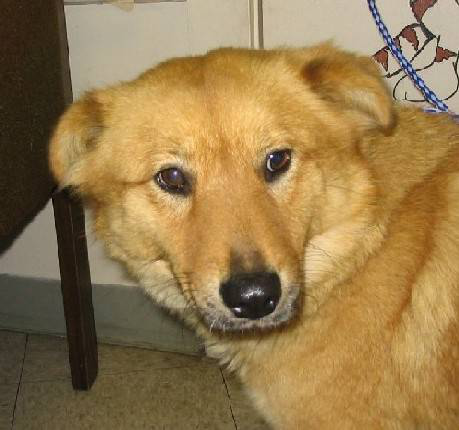

In [ ]:
item1_path = data.items[100]
print(item1_path)
item1 = data.open( item1_path )
item1

In [ ]:
pred_class, pred_idx, outputs = learn.predict(item1)
probs = torch.nn.functional.softmax(np.log(outputs), dim=0)
print(pred_class)
print(probs)

Now the Test Set

In [ ]:
data_test = ImageList.from_folder(test_folder).split_none().label_empty()
data_test

LabelLists;

Train: LabelList (96 items)
x: ImageList
Image (3, 499, 381),Image (3, 365, 500),Image (3, 499, 438),Image (3, 288, 383),Image (3, 400, 399)
y: EmptyLabelList
,,,,
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/val;

Valid: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/val;

Test: None

In [ ]:
dst = data_test.train.x[:20]
dst

ImageList (20 items)
Image (3, 499, 381),Image (3, 365, 500),Image (3, 499, 438),Image (3, 288, 383),Image (3, 400, 399)
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/val

In [ ]:
learn.data

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

ImageDataBunch;

Train: LabelList (336 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
dog,dog,dog,dog,dog
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train;

Valid: LabelList (111 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
dog,dog,dog,dog,cat
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train;

Test: None

In [ ]:
data.add_test(items=dst)
data

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

ImageDataBunch;

Train: LabelList (336 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
dog,dog,dog,dog,dog
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train;

Valid: LabelList (111 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
dog,dog,dog,dog,cat
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train;

Test: LabelList (20 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train

In [ ]:
learn.data = data
learn.data

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

ImageDataBunch;

Train: LabelList (336 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
dog,dog,dog,dog,dog
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train;

Valid: LabelList (111 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
dog,dog,dog,dog,cat
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train;

Test: LabelList (20 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: /content/drive/MyDrive/NN_WS2021/Projekt/Datashort/train

In [ ]:
pred_probs, pred_class = learn.get_preds(ds_type=DatasetType.Test)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
print(pred_probs)
print(pred_class)
print((pred_probs.numpy()[:,0]>0.5)+0)

tensor([[7.2180e-04, 9.9928e-01],
        [1.6189e-01, 8.3811e-01],
        [6.7368e-01, 3.2632e-01],
        [6.4848e-01, 3.5152e-01],
        [2.0912e-02, 9.7909e-01],
        [2.2300e-01, 7.7700e-01],
        [9.9722e-01, 2.7843e-03],
        [9.2648e-02, 9.0735e-01],
        [1.8941e-01, 8.1059e-01],
        [5.8123e-03, 9.9419e-01],
        [4.6221e-02, 9.5378e-01],
        [6.7831e-01, 3.2169e-01],
        [4.3109e-03, 9.9569e-01],
        [7.5921e-01, 2.4079e-01],
        [2.1293e-02, 9.7871e-01],
        [6.3832e-01, 3.6168e-01],
        [5.4931e-02, 9.4507e-01],
        [1.3492e-03, 9.9865e-01],
        [7.0847e-01, 2.9153e-01],
        [6.8063e-01, 3.1937e-01]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
[0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1]


In [ ]:
df = pd.DataFrame(os.listdir(test_folder))
print(len(df))
df.head()

97


,0
0,1.jpg
1,29.jpg
2,53.jpg
3,32.jpg
4,5.jpg


In [ ]:
img_idx = 8
print(pred_class[img_idx])
data_test.train.x[img_idx]
plt.imshow(plt.imread(test_folder+df[0].iloc[img_idx]))
# test_folder+df[0]

tensor(0)


FileNotFoundError: ignored

In [ ]:
submission_data = [ids, pred_class]

df = pd.DataFrame(submission_data).T
df.columns = ['id','label']
df.head()

NameError: ignored

In [ ]:
df.to_csv('./kaggle_catsdogs.csv', index=False)
print( os.path.exists('./kaggle_catsdogs.csv') )

In [ ]:
!rm -rf dogscats